In [2]:
class Rectangle:
    def __init__(self, x, y, width, height):
        self.x = x
        self.y = y
        self.width = width
        self.height = height
    def __str__(self):
        return f"Rectangle(x={self.x}, y={self.y}, width={self.width}, height={self.height})"
        

rectangle_list = []

x = 490
y = 988
width = 1007 - 490
height = 1060 - 990

for i in range(4):
    rec = Rectangle(x,y + (76 * i), width, height)
    rectangle_list.append(rec)

x = 1019
for i in range(4):
    rec = Rectangle(x,y + (76 * i), width, height)
    rectangle_list.append(rec)


In [3]:
for rec in rectangle_list:
    print(rec)

Rectangle(x=490, y=988, width=517, height=70)
Rectangle(x=490, y=1064, width=517, height=70)
Rectangle(x=490, y=1140, width=517, height=70)
Rectangle(x=490, y=1216, width=517, height=70)
Rectangle(x=1019, y=988, width=517, height=70)
Rectangle(x=1019, y=1064, width=517, height=70)
Rectangle(x=1019, y=1140, width=517, height=70)
Rectangle(x=1019, y=1216, width=517, height=70)


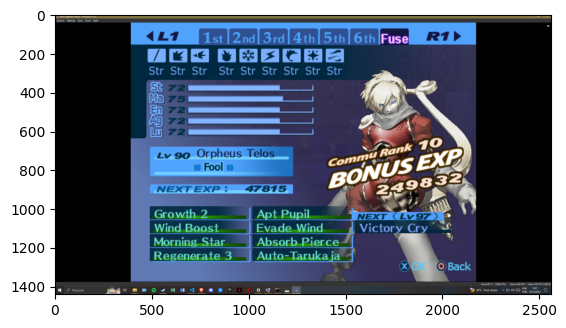

In [4]:
import os
import matplotlib.pyplot as plt
from PIL import Image

directory = r"C:\Users\Eduardo\Pictures\Screenshots\persona3Telos"

file = '0.png'

# open the image
img = Image.open(os.path.join(directory, file))

#print the image
plt.imshow(img)

In [ ]:
import matplotlib.pyplot as plt
from PIL import ImageEnhance
import numpy as np

# Iterate over the rectangles in the list
for i, rectangle in enumerate(rectangle_list):
    # Crop the image
    cropped_img = img.crop((rectangle.x, rectangle.y, rectangle.x + rectangle.width, rectangle.y + rectangle.height))

    # Convert the image to RGB
    rgb_img = cropped_img.convert('RGB')

    hex_color = '65dfcd'

    # Convert the target hex color to RGB
    target_r, target_g, target_b = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
    target_color = np.array([target_r, target_g, target_b])

    # Iterate over each pixel in the image
    for y in range(rgb_img.height):
        for x in range(rgb_img.width):
            # Get the RGB color of the pixel
            r, g, b = rgb_img.getpixel((x, y))
            current_color = np.array([r, g, b])

            # Calculate the Euclidean distance between the current color and the target color
            color_distance = np.linalg.norm(current_color - target_color)

            # If the color distance is less than the threshold, change the color to black, else change it to white
            if color_distance < 65:  # You can adjust the threshold to get the desired level of color similarity
                rgb_img.putpixel((x, y), (0, 0, 0))  # black
            else:
                rgb_img.putpixel((x, y), (255, 255, 255))  # white
    # Display the cropped image
    plt.figure(i)
    plt.imshow(rgb_img)
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Open the file and iterate over the lines
with open('list_unique_skill_crops.txt', 'r') as f:
    for line in f:
        # Remove the newline character at the end of the line
        line = line.rstrip('\n')

        # Replace '.txt' with '.png' to get the image path
        img_path = line.replace('.txt', '.png')

        # Open the image
        img = Image.open(img_path)

        # Plot the image
        plt.figure()
        plt.imshow(img)
        plt.show()

In [22]:
import os

mainDirectory = r"C:\Users\Eduardo\Pictures\Screenshots\persona3Telos"

# Create a directory named after the original file
directory = os.path.splitext(file)[0]

fullDirecotry = os.path.join(mainDirectory, directory)

os.makedirs(fullDirecotry, exist_ok=True)

print(f"Created directory {fullDirecotry}")

# Iterate over the rectangles in the list
for i, rectangle in enumerate(rectangle_list):
    # Crop the image
    cropped_img = img.crop((rectangle.x, rectangle.y, rectangle.x + rectangle.width, rectangle.y + rectangle.height))

    # Save the cropped image to a file
    cropped_img.save(os.path.join(fullDirecotry, f"cropped_{i}.png"))


Created directory C:\Users\Eduardo\Pictures\Screenshots\persona3Telos\0


In [20]:
import os

mainDirectory = r"C:\Users\Eduardo\Pictures\Screenshots\persona3Telos"


for directory in range(4415,10000):

    fullDirecotry = os.path.join(mainDirectory, str(directory))

    os.makedirs(fullDirecotry, exist_ok=True)

    img = Image.open(os.path.join(fullDirecotry + ".png"))

    print(f"Opened image {fullDirecotry}.png")

    # Iterate over the rectangles in the list
    for i, rectangle in enumerate(rectangle_list):
        # Crop the image
        cropped_img = img.crop((rectangle.x, rectangle.y, rectangle.x + rectangle.width, rectangle.y + rectangle.height))


        # Convert the image to RGB
        rgb_img = cropped_img.convert('RGB')

        hex_color = '65dfcd'

        # Convert the target hex color to RGB
        target_r, target_g, target_b = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
        target_color = np.array([target_r, target_g, target_b])

        # Convert the image to a NumPy array
        img_array = np.array(rgb_img)

        # Calculate the Euclidean distance between each pixel's color and the target color
        color_distance = np.linalg.norm(img_array - target_color, axis=2)

        # Create a mask for pixels that are similar to the target color
        mask = color_distance < 65

        # Change the color of the pixels based on the mask
        img_array[mask] = [0, 0, 0]  # black
        img_array[~mask] = [255, 255, 255]  # white

        # Convert the NumPy array back to an image
        rgb_img = Image.fromarray(img_array)

        # Convert the image to grayscale
        gray_img = rgb_img.convert('L')

        # Apply a threshold to make it binary
        binary_img = gray_img.point(lambda x: 0 if x<128 else 255, '1')

        # Save the binary image
        binary_img.save(os.path.join(fullDirecotry, f"cropped_{i}.png"))


Opened image C:\Users\Eduardo\Pictures\Screenshots\persona3Telos\4415.png
Opened image C:\Users\Eduardo\Pictures\Screenshots\persona3Telos\4416.png
Opened image C:\Users\Eduardo\Pictures\Screenshots\persona3Telos\4417.png
Opened image C:\Users\Eduardo\Pictures\Screenshots\persona3Telos\4418.png
Opened image C:\Users\Eduardo\Pictures\Screenshots\persona3Telos\4419.png
Opened image C:\Users\Eduardo\Pictures\Screenshots\persona3Telos\4420.png
Opened image C:\Users\Eduardo\Pictures\Screenshots\persona3Telos\4421.png
Opened image C:\Users\Eduardo\Pictures\Screenshots\persona3Telos\4422.png
Opened image C:\Users\Eduardo\Pictures\Screenshots\persona3Telos\4423.png
Opened image C:\Users\Eduardo\Pictures\Screenshots\persona3Telos\4424.png
Opened image C:\Users\Eduardo\Pictures\Screenshots\persona3Telos\4425.png
Opened image C:\Users\Eduardo\Pictures\Screenshots\persona3Telos\4426.png
Opened image C:\Users\Eduardo\Pictures\Screenshots\persona3Telos\4427.png
Opened image C:\Users\Eduardo\Pictures

In [18]:
import os

mainDirectory = r"C:\Users\Eduardo\Pictures\Screenshots\persona3Telos"

with open('list_10_skill_crops_images.txt', 'r') as f:
    for fullDirectory in f:

        # Remove the newline character at the end of the line
        fullDirectory = fullDirectory.rstrip('\n')

        os.makedirs(fullDirectory.strip('.png'), exist_ok=True)

        img = Image.open(fullDirectory)

        print(f"Opened image {fullDirectory}")

        # Iterate over the rectangles in the list
        for i, rectangle in enumerate(rectangle_list):
            # Crop the image
            cropped_img = img.crop((rectangle.x, rectangle.y, rectangle.x + rectangle.width, rectangle.y + rectangle.height))


            # Convert the image to RGB
            rgb_img = cropped_img.convert('RGB')

            hex_color = '65dfcd'

            # Convert the target hex color to RGB
            target_r, target_g, target_b = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
            target_color = np.array([target_r, target_g, target_b])

            # Iterate over each pixel in the image
            for y in range(rgb_img.height):
                for x in range(rgb_img.width):
                    # Get the RGB color of the pixel
                    r, g, b = rgb_img.getpixel((x, y))
                    current_color = np.array([r, g, b])

                    # Calculate the Euclidean distance between the current color and the target color
                    color_distance = np.linalg.norm(current_color - target_color)

                    # If the color distance is less than the threshold, change the color to black, else change it to white
                    if color_distance < 65:  # You can adjust the threshold to get the desired level of color similarity
                        rgb_img.putpixel((x, y), (0, 0, 0))  # black
                    else:
                        rgb_img.putpixel((x, y), (255, 255, 255))  # white

            # Convert the image to grayscale
            gray_img = rgb_img.convert('L')

            # Apply a threshold to make it binary
            binary_img = gray_img.point(lambda x: 0 if x<128 else 255, '1')

            # Save the binary image
            binary_img.save(os.path.join(fullDirecotry, f"cropped_{i}.png"))

Opened image C:\Users\Eduardo\Pictures\Screenshots\persona3Telos\0.png
Opened image C:\Users\Eduardo\Pictures\Screenshots\persona3Telos\29.png
Opened image C:\Users\Eduardo\Pictures\Screenshots\persona3Telos\43.png
Opened image C:\Users\Eduardo\Pictures\Screenshots\persona3Telos\49.png
Opened image C:\Users\Eduardo\Pictures\Screenshots\persona3Telos\52.png


KeyboardInterrupt: 